In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [10]:
# Create dataframe with all control records
control_df = df.query('group=="control"')

# Compute completion rate
control_cr = control_df.query('completed==True').shape[0]/control_df.shape[0]

# Display completion rate
control_cr

0.3719951923076923

In [11]:
# Create dataframe with all experiment records
experiment_df = df.query('group=="experiment"')

# Compute completion rate
experiment_ctr = experiment_df.query('completed==True').shape[0]/experiment_df.shape[0]

# Display completion rate
experiment_ctr

0.3935334872979215

In [13]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr-control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [14]:
df.shape[0]

3829

In [33]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    samp=df.sample(df.shape[0],replace=True)
    a1=samp.query('group=="control"')
    b1=samp.query('group=="experiment"')
    c1=a1.query('completed==True').shape[0]/a1.shape[0]
    d1=b1.query('completed==True').shape[0]/b1.shape[0]
    diffs.append(d1-c1)

In [34]:
# convert to numpy array
diffs = np.array(diffs)

In [35]:
len(diffs)

10000

(array([   29.,   213.,   715.,  1829.,  2710.,  2473.,  1406.,   488.,
          120.,    17.]),
 array([-0.03219831, -0.02105596, -0.00991361,  0.00122874,  0.01237109,
         0.02351344,  0.03465578,  0.04579813,  0.05694048,  0.06808283,
         0.07922518]),
 <a list of 10 Patch objects>)

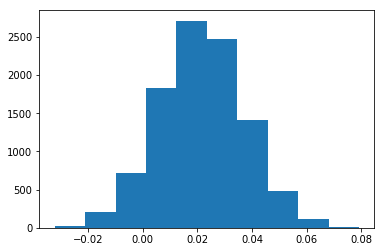

In [36]:
# plot distribution
plt.hist(diffs)

In [37]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),10000)

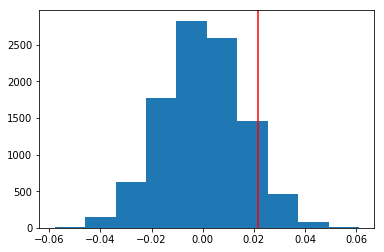

In [38]:
# plot null distribution
plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(x=obs_diff,color='red')

In [30]:
obs_diff

0.02153829499022919

In [31]:
null_vals

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [25]:
# compute p value
(null_vals > obs_diff).mean()

0.0